#  MACHINE LEARNING LAB 
## PRACTICAL 2
## Name :- Awez Sheikh
## Batch & Roll No. :- A2-32



#  Importing Required Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('C:/Users/kndak/Downloads/titanic - titanic.csv')

## Basic EDA

In [5]:
df.shape

(891, 12)

In [6]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Get the list of columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Get the Statistical Information about the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. The dataset includes information about 891 passengers, not just survivors.

2. There are 11 features, but they are not all numeric type. The dataset has a mix of numeric (int64 and float64) and object (string) types.

     categorical features: Name, Sex, Ticket, Cabin, Embarked <br>
     numerical features: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare "<br> 
<br> 

3. The target variable is Survived, where 0 indicates the passenger did not survive, and 1 indicates they did.

4. There are missing values in the dataset, specifically in the Age and Cabin features.


In [18]:
# Check for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Age has around 177 null values.
2. Cabin has around  687 null values.
3. Embarked  has around  2 null values.


In [12]:
# Check for Duplicate Values
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<AxesSubplot:>

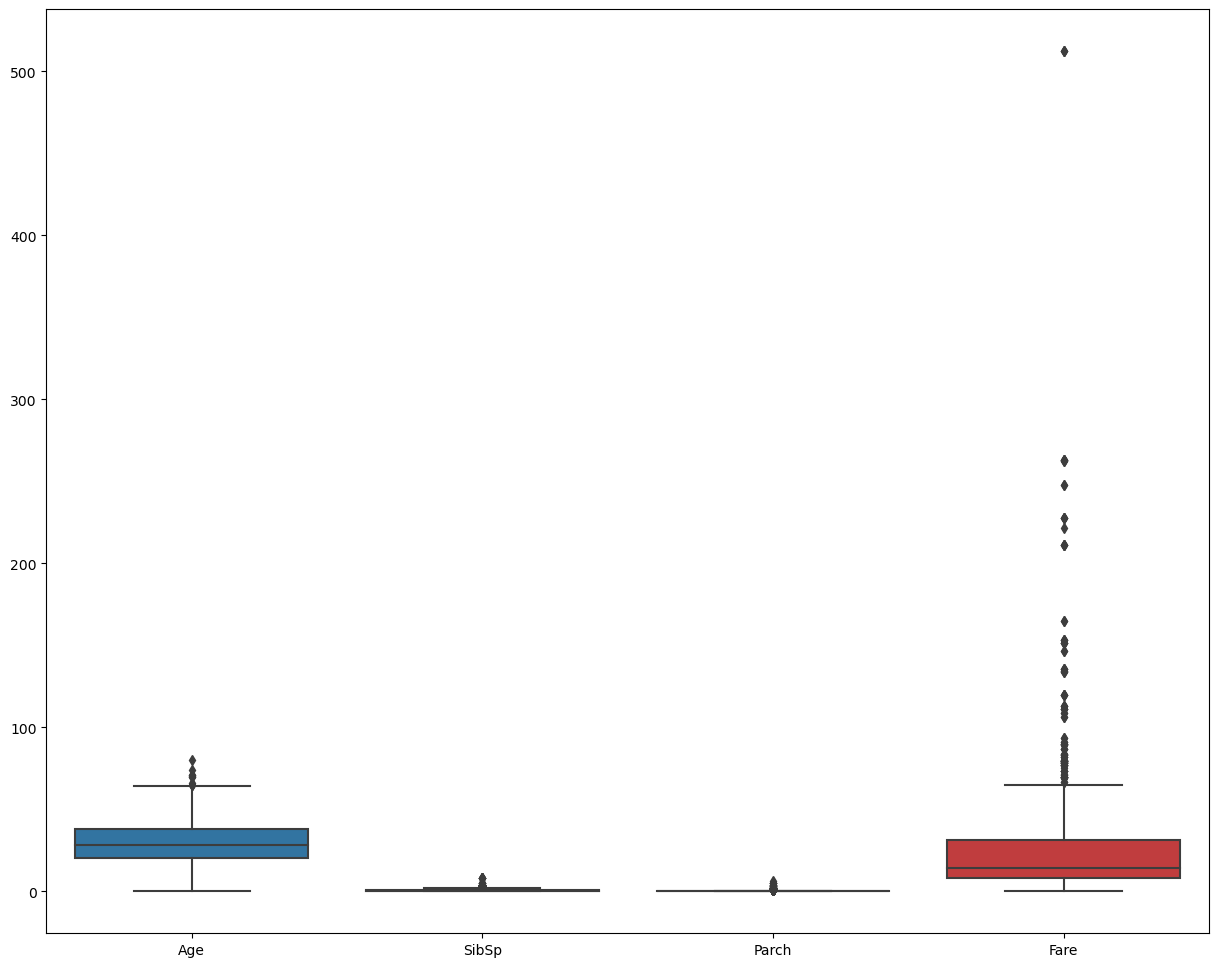

In [13]:
# Checking for the presence of outliers in numeric cols ('age','trtbps','chol','thalachh','oldpeak')

plt.figure(figsize=(15,12)) # Set the Width & Height
# df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak'])  
sns.boxplot(data=df[['Age', 'SibSp', 'Parch', 'Fare']])

In [ ]:
#Finding values of outliers(IQR method)
# 1. Sort the dataset in ascending order,
# 2 calculate the 1st and 3rd quartiles(Q1, Q3)
# 3  compute IQR=Q3-Q1,
# 4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
# 5 loop through the values of the dataset and check for those who fall below the lower bound 
#and above the upper bound and mark them as outliers



There are outliers in age , SibSp(Number of siblings/spouses aboard) , Parch( Number of parents/children aboard) and Fare attributes.

In [14]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    return outlier_list 

for col in ['Age', 'SibSp', 'Parch', 'Fare']:  # changed column names to match the Titanic dataset
    outliers = detect_outliers_iqr(df[col].dropna())  # added .dropna() to ignore NaN values
    print("Outliers in", col, "attribute :", outliers)

Outliers in Age attribute : [65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
Outliers in SibSp attribute : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8]
Outliers in Parch attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6]
Outliers in Fare attribute : [66.6, 66.6, 69.3, 69.3, 69.55, 69.55

In [20]:
def handle_outliers(data):
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1

for i in ['Age', 'SibSp', 'Parch', 'Fare']:
    df[i] = handle_outliers(df[i])

<AxesSubplot:>

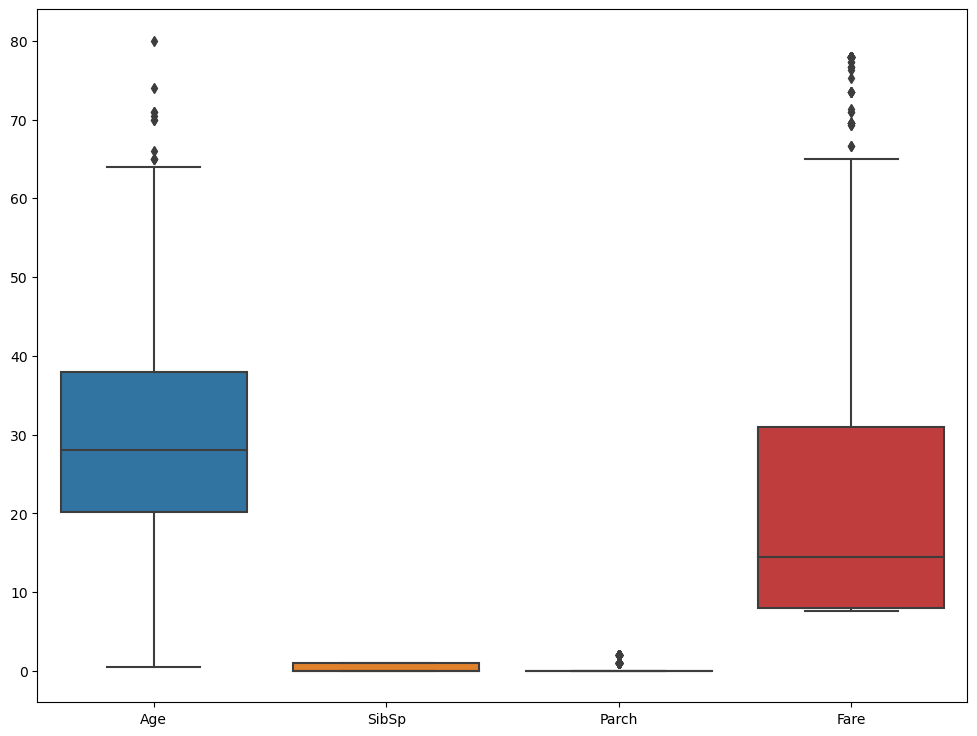

In [21]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df[['Age', 'SibSp', 'Parch', 'Fare']])

# Visualization

In this section, we will get an idea about our patients by considering all the features separately.

In [22]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.55,NaN,S


## Univariate Analysis

out of 891 62 % people did not survive
out of 891 38 % people survived


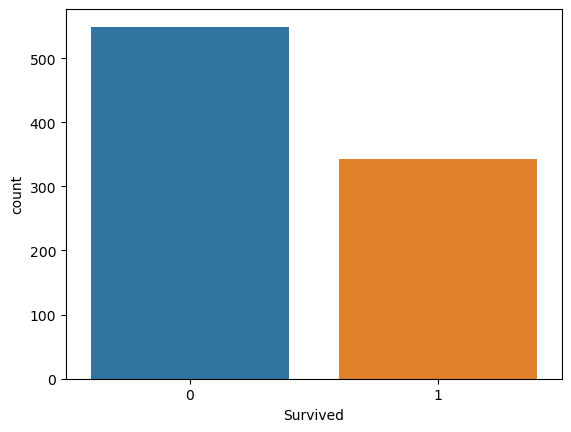

In [23]:
# Output Column
# countplot is used to displays the count of observations for each category

# sns.countplot(data=df['Survived'])
sns.countplot(x='Survived', data=df)

not_survived = round (df['Survived'].value_counts().values[0]/891*100)
survived = round (df['Survived'].value_counts().values[1]/891*100)

# Observation
print('out of 891 {} % people did not survive'.format(not_survived))
print('out of 891 {} % people survived'.format(survived))

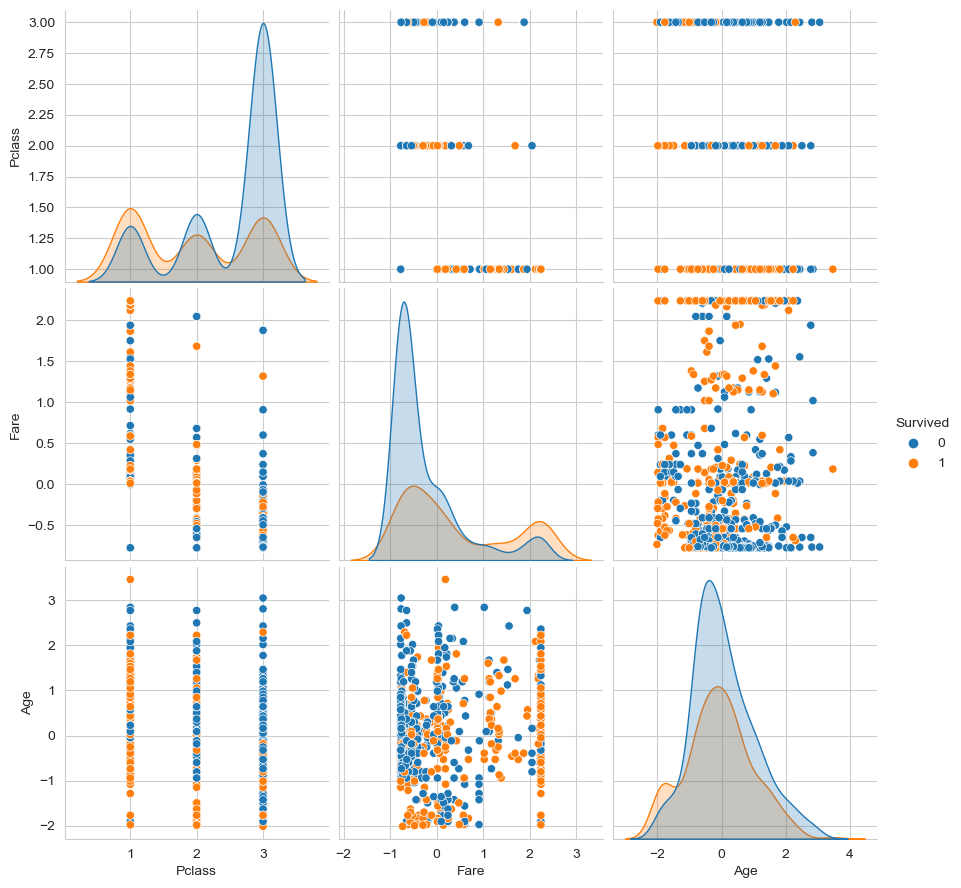

In [64]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

From the above grid of plots, we can see that passengers who paid higher fares or traveling in the upper class have a higher chance to survive.
Age is also giving some info like young persons have a higher chance to survive than old peoples.
The picture is not very clear with pair plots so let's go towards uni-variate analysis to understand what exactly is happening.

out of 891 65 % passengers are male
out of 891 35 % passengers are female


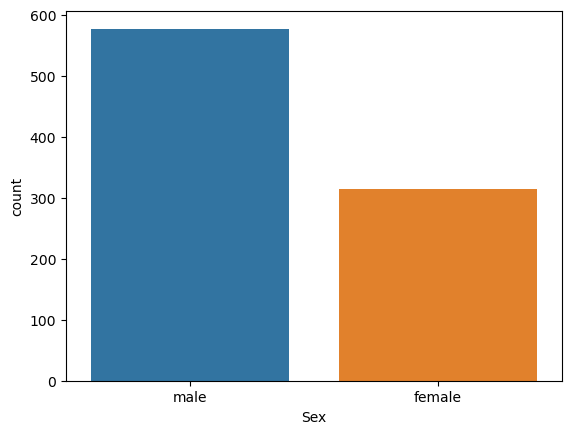

In [26]:
# Sex Column
sns.countplot(x='Sex', data=df)

male = round (df['Sex'].value_counts()['male']/891*100)
female = round (df['Sex'].value_counts()['female']/891*100)

# Observation
print('out of 891 {} % passengers are male'.format(male))
print('out of 891 {} % passengers are female'.format(female))

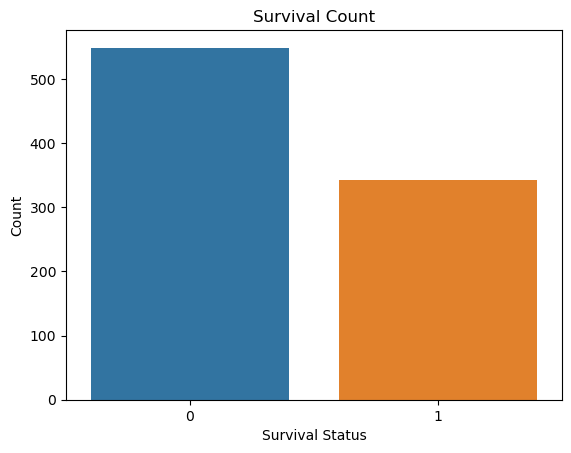

In [27]:
# Bar plot
sns.countplot(x='Survived', data=df)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

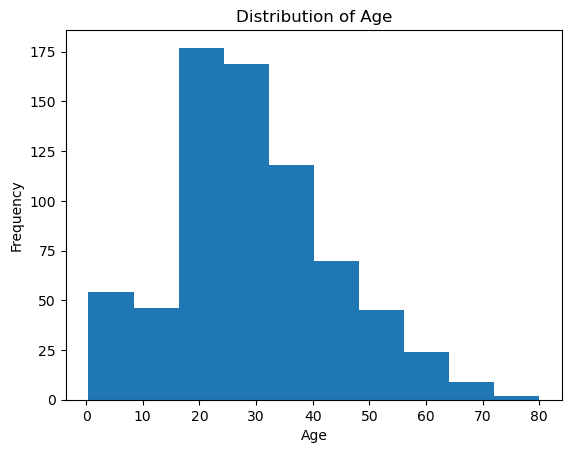

In [28]:

# Histogram
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

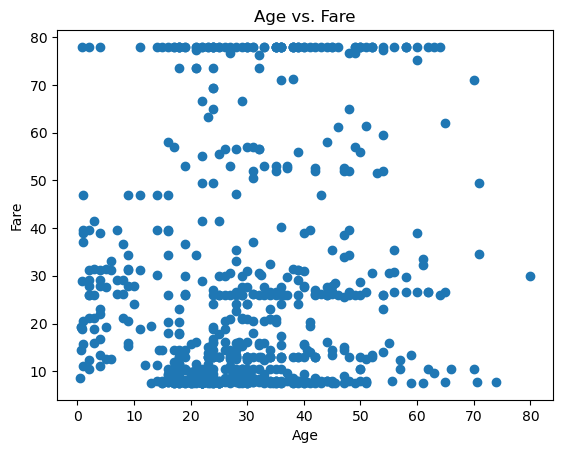

In [29]:
# Scatter plot
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

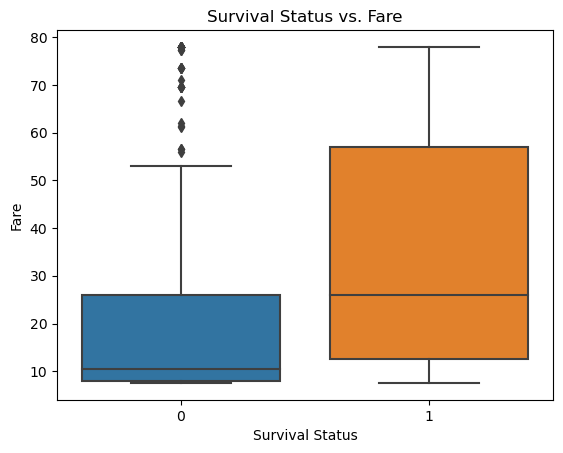

In [30]:
# Box plot
sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

# Exploring Relationships


EDA involves exploring relationships between variables to uncover insights. We can use techniques like correlation analysis or cross-tabulation for this purpose.

In [38]:
# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.155083
Fare  0.155083  1.000000
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0.5, 1.0, 'Correlation map')

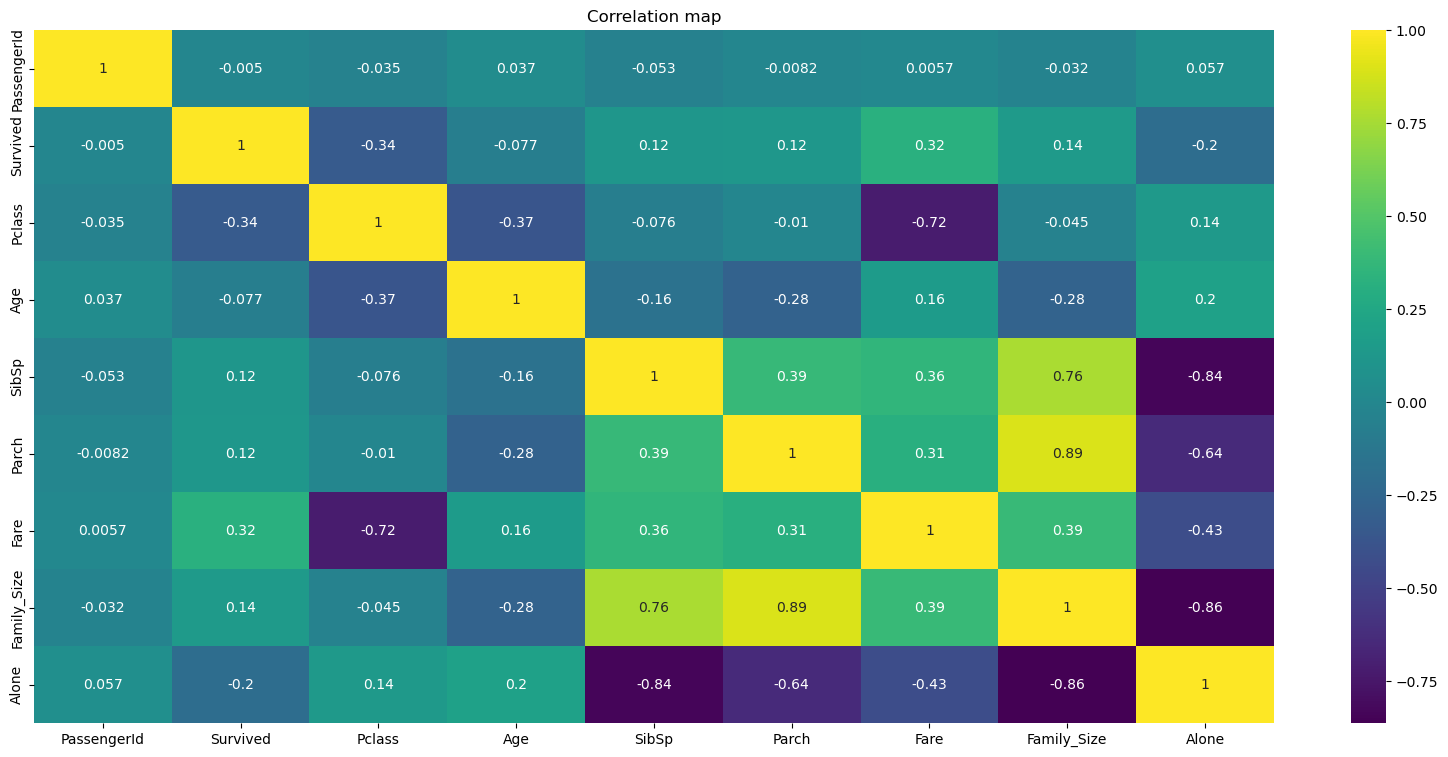

In [53]:
# Heatmap is use to display correlation between different variable
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True, cmap='viridis');  
plt.title("Correlation map")

KeyError: 'Survived'

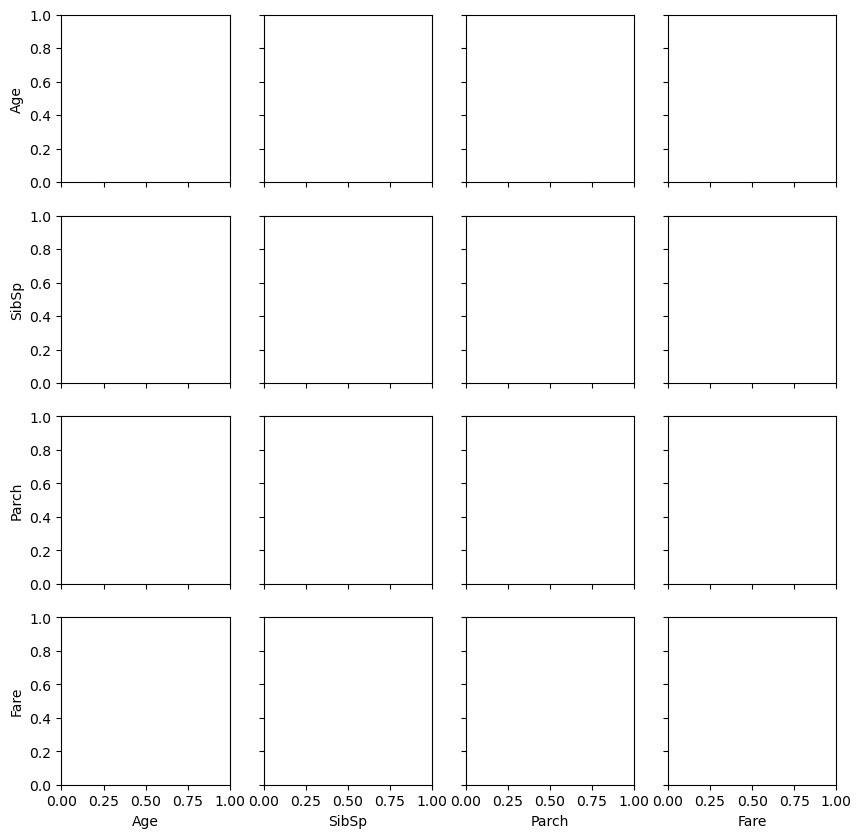

In [50]:
sns.pairplot(df[['Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')

# Pclass (Ordinal Feature) vs Survived  

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

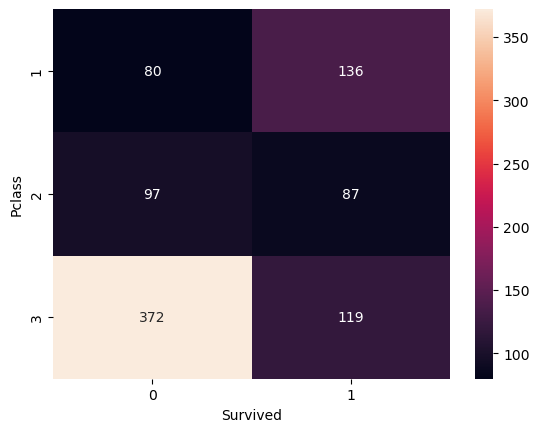

In [34]:
# Group the dataset by Pclass and Survived and then unstack them 
group = df.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 

# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 


It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

# Age (Continuous Feature) vs Survived  

<AxesSubplot:xlabel='Sex', ylabel='Age'>

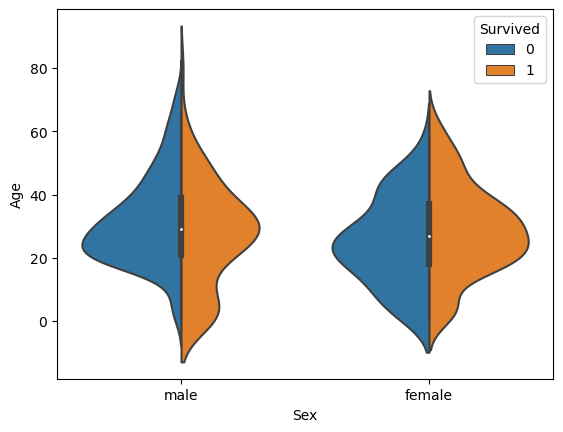

In [37]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True) 

# Factor plot for Family_Size (Count Feature) and Family Size.

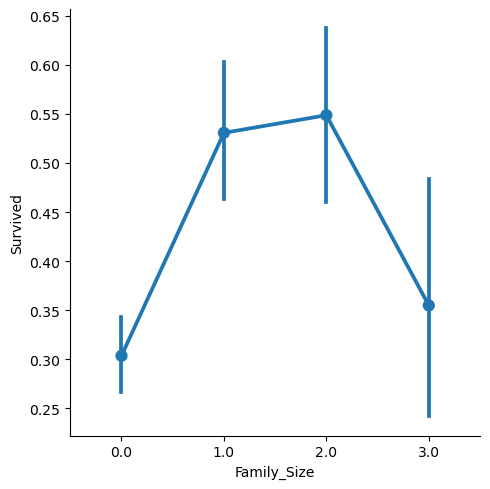

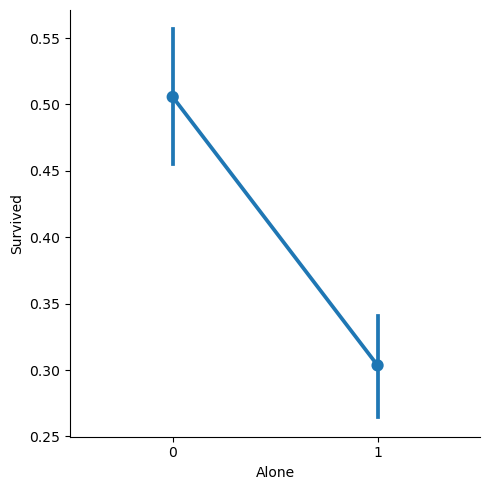

In [43]:
# Adding a column Family_Size 
df['Family_Size'] = 0
df['Family_Size'] = df['Parch']+df['SibSp'] 

# Adding a column Alone 
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = df) 

# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = df) 


Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations – 

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decrease considerably.

# Bar Plot for Fare (Continuous Feature)  

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

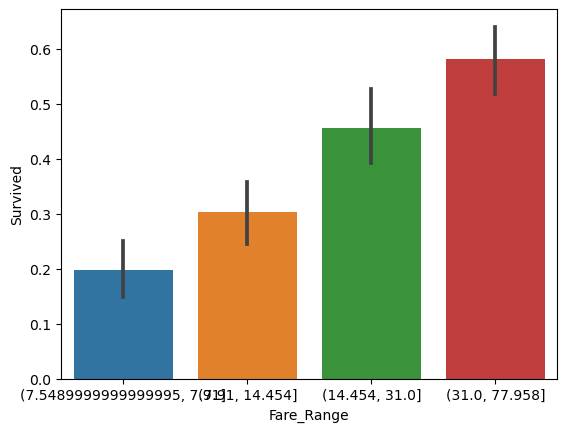

In [46]:
# Divide Fare into 4 bins 
df['Fare_Range'] = pd.qcut(df['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived',  
data =df) 

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

# Categorical Count Plots for Embarked Feature  

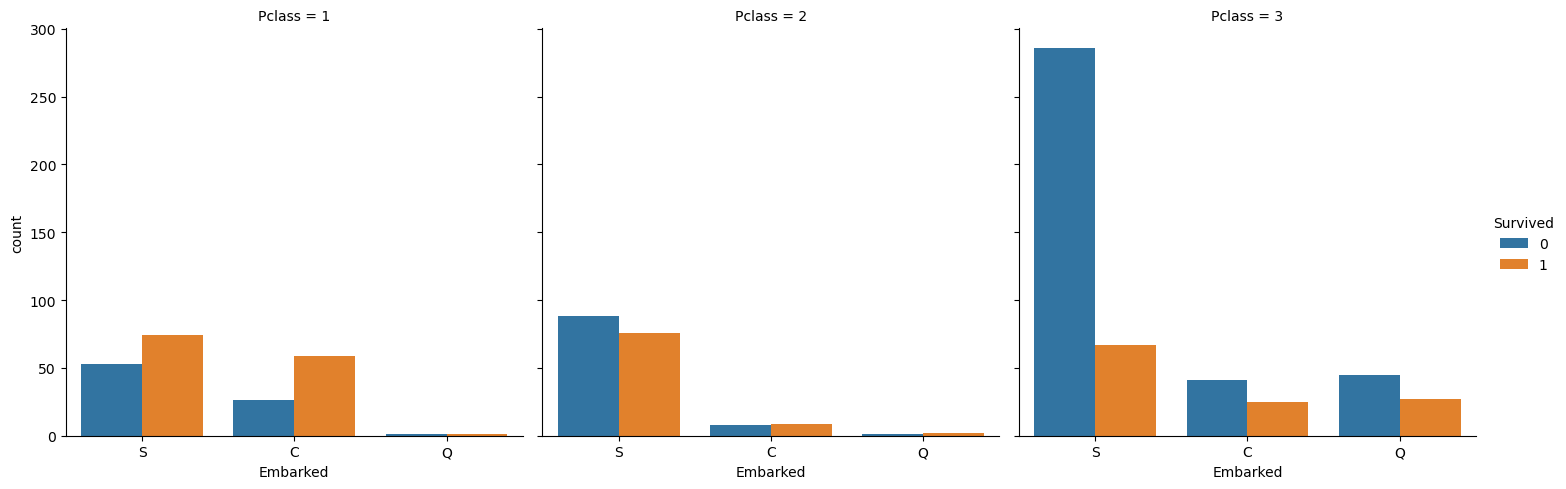

In [48]:
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = df) 


Some notable observations are: <br>

Majority of the passengers boarded from S. So, the missing values can be filled with S.<br>
Majority of class 3 passengers boarded from Q.<br>
S looks lucky for class 1 and 2 passengers compared to class 3.<br>

# Feature Scaling

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.5500,NaN,S,1.0,0,"(7.5489999999999995, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,1.0,0,"(31.0, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,1.0,0,"(31.0, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,0.0,1,"(7.91, 14.454]"


In [55]:
from sklearn.preprocessing import StandardScaler  # Standardization
# from sklearn.preprocessing import MinMaxScaler  # Normalization

scale = StandardScaler()
# scale = MinMaxScaler()
df[['Age', 'SibSp', 'Parch', 'Fare']] = scale.fit_transform(df[['Age', 'SibSp', 'Parch', 'Fare']])

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1.465746,-0.521469,A/5 21171,-0.774448,NaN,S,1.0,0,"(7.5489999999999995, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1.465746,-0.521469,PC 17599,1.952669,C85,C,1.0,0,"(31.0, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.682247,-0.521469,STON/O2. 3101282,-0.758401,NaN,S,0.0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1.465746,-0.521469,113803,1.174615,C123,S,1.0,0,"(31.0, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.682247,-0.521469,373450,-0.753053,NaN,S,0.0,1,"(7.91, 14.454]"


# Data Preparation

In [57]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [58]:
# Split dataset into features and target variable

feature_cols = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Fare']
X = df[feature_cols]  # Features
y = df.Survived  # Target variable

In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [60]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [61]:
X_train.shape

(712, 6)

In [62]:
 X_test.shape

(179, 6)

# Conclusion

From this EDA we got to identify important features og the data which helped us understand who had a higher chance of survival on the titanic depending on the feature like gender , age , fare paid , or who had a family.